# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, classification_report                                                   # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Mount google drive where the images are stored

In [5]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Computer vision datasets/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Computer vision datasets/Labels.csv')

* Loaded the images and their labels from the mounted drive

## Data Overview

### Understand the shape of the dataset

In [6]:
# Print the shape of the images and labels
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Images shape: (4750, 128, 128, 3)
Labels shape: (4750, 1)


* There are 4750 images with a height and width of 128 pixels
* The number of images matches the number of labels


In [7]:
# Inspect 7 random labels
print(labels.sample(7))

                  Label
1206       Common wheat
1392       Common wheat
3014  Scentless Mayweed
3141  Scentless Mayweed
2615           Cleavers
1224       Common wheat
1004    Shepherds Purse


In [8]:
#check unique image sizes in the dataset
unique_shapes = set([img.shape for img in images])
print(f"Unique image shapes: {unique_shapes}")

Unique image shapes: {(128, 128, 3)}


* All the images are the same size which makes their processing easy


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Display 6 random images

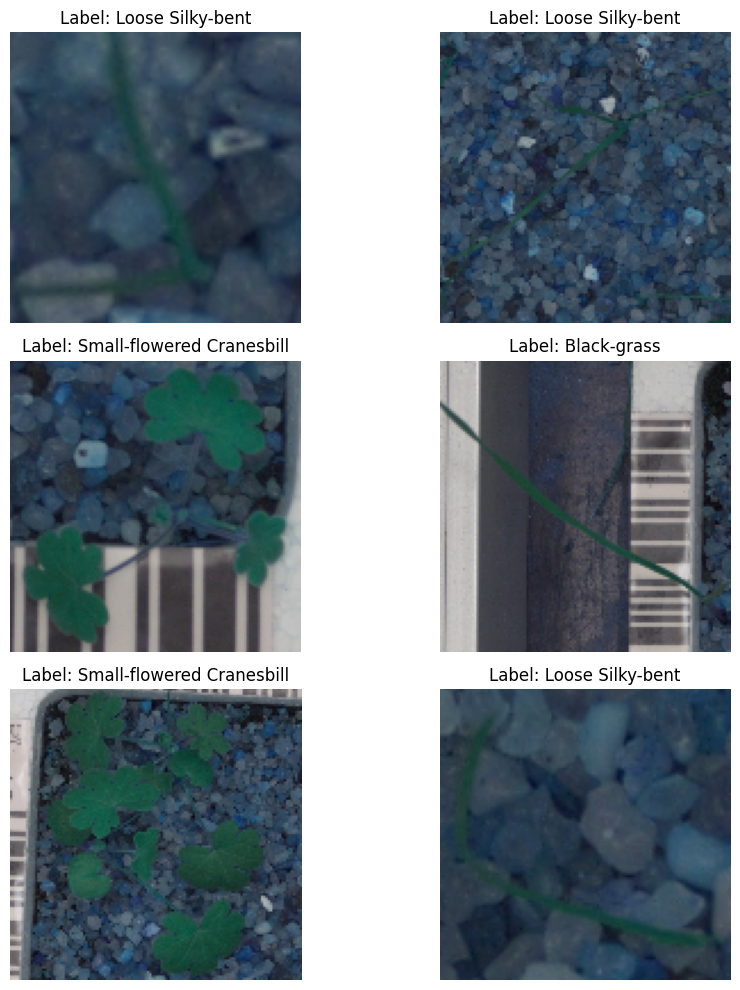

In [9]:
# Display 5 random images with labels
random_indices = random.sample(range(len(images)), 6)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 2, i + 1)
    plt.imshow(images[idx])
    plt.title(f"Label: {labels.iloc[idx, 0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- Some classes are a bit similar
- Most classes have distinct features
- Some classes have smaller sizes

### Check the distribution of labels

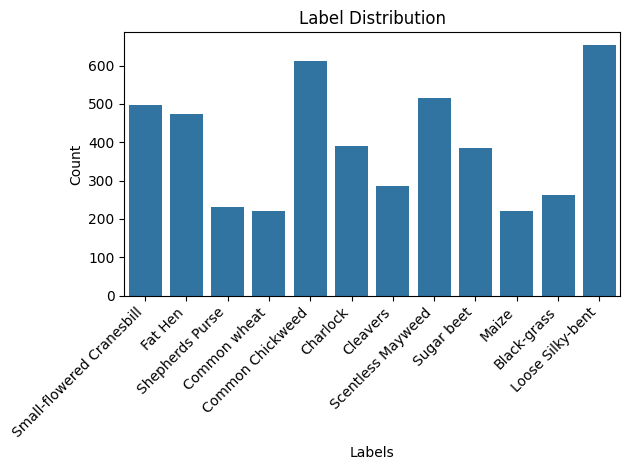

In [10]:
# Plot the distribution of labels
g = sns.countplot(x=labels['Label'])
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

- The dataset shows a significant imbalance across different classes
- Classes such as "Charlock" and "Loose Silky-bent" have the highest counts, while classes like "Common Wheat", "Shepherd's Purse" and "Black-grass" have fewer samples.
- This imbalance can negatively impact the model's performance, leading to biased predictions favoring majority classes.

### Check image pixel intensity ranges

In [11]:
# Check pixel intensity ranges (min, max, mean, std)
print(f"Pixel intensity range: {images.min()} to {images.max()}")
print(f"Mean pixel value: {images.mean():.2f}")
print(f"Standard deviation of pixel values: {images.std():.2f}")

# Normalize the images
images_normalized = images / 255.0
print(f"Normalized pixel range: {images_normalized.min()} to {images_normalized.max()}")


Pixel intensity range: 0 to 255
Mean pixel value: 70.04
Standard deviation of pixel values: 32.00
Normalized pixel range: 0.0 to 1.0


### Check the unique size of images

In [12]:
# Confirm all images are of the same size
unique_shapes = set([img.shape for img in images])
print(f"Unique image shapes: {unique_shapes}")

Unique image shapes: {(128, 128, 3)}


### Visualize one random label

Randomly selected label: Maize



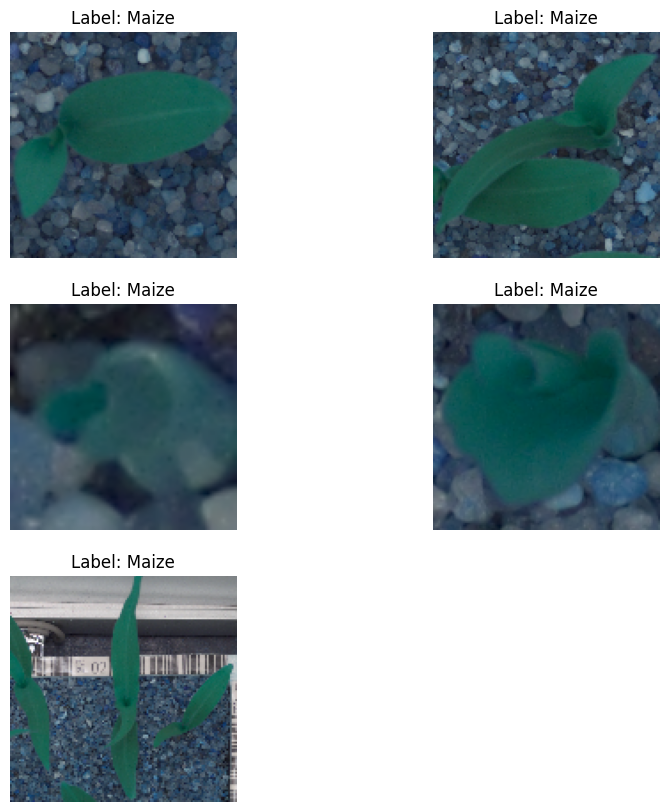

In [13]:
# Visualize some images from one random label
rand_label = random.choice(labels['Label'].unique())
print(f"Randomly selected label: {rand_label}\n")
indices = labels.index[labels['Label'] == rand_label].tolist()

plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices[:5]):
    plt.subplot(3, 2, i + 1)
    plt.imshow(images[idx])
    plt.title(f"Label: {rand_label}")
    plt.axis('off')
plt.show()

## Data Pre-Processing

### Convert the BGR images to RGB images.

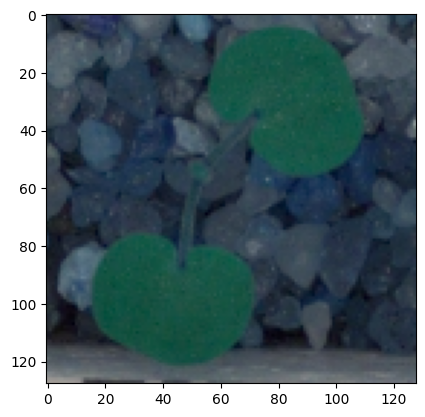

In [14]:
#Display image[4] before converting to RGB
plt.imshow(images[4]);

In [15]:
#Convert BGR images to RGB
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

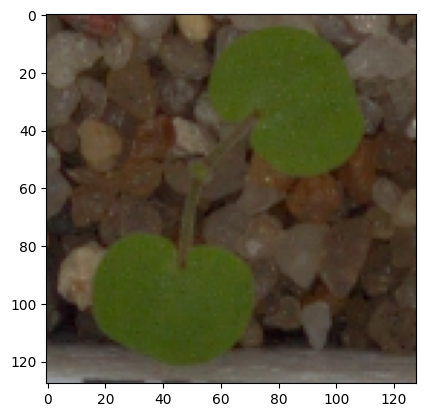

In [16]:
# Display image[4] after converting to RGB
plt.imshow(images[4]);

* The images have been converted to RGB from BGR

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

**Image before resizing**

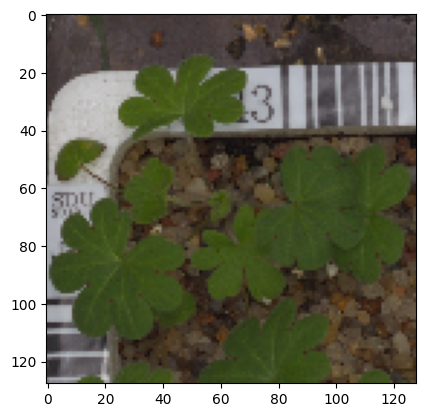

In [17]:
plt.imshow(images[3]);

**Resize the image**

In [18]:
#REduce image size from 128 to 64 and store images in a new array
images_resized = []
for i in range(len(images)):
    images_resized.append (cv2.resize(images[i], (64, 64),interpolation=cv2.INTER_LINEAR))

**Image after resizing**

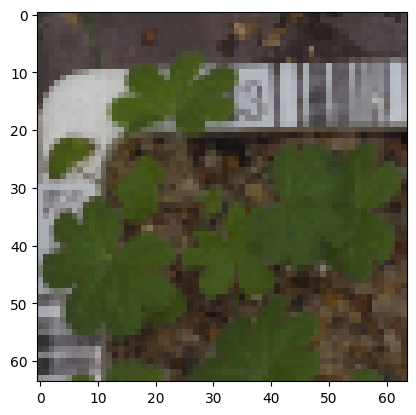

In [19]:
plt.imshow(images_resized[3]);

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [20]:
#Split the data into train, test and validation
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_resized), labels['Label'], test_size=0.1, random_state=42,stratify=labels['Label'])
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42,stratify=y_temp)

In [21]:
# check the shape of train, validation and test data
print(f'The shape for train data: {X_train.shape,y_train.shape}')
print(f'The shape for validation data: {X_val.shape,y_val.shape}')
print(f'The shape for test data: {X_test.shape,y_test.shape}')

The shape for train data: ((3420, 64, 64, 3), (3420,))
The shape for validation data: ((855, 64, 64, 3), (855,))
The shape for test data: ((475, 64, 64, 3), (475,))


### Encode the target labels

In [22]:
# Convert labels from names to one hot vectors using labelBinarizer
lb = LabelBinarizer()
y_train_enc = lb.fit_transform(y_train)
y_val_enc = lb.transform(y_val)
y_test_enc = lb.transform(y_test)

In [23]:
# check the shape of train, validation and test data
print(f'The shape for train data: {X_train.shape,y_train_enc.shape}')
print(f'The shape for validation data: {X_val.shape,y_val_enc.shape}')

The shape for train data: ((3420, 64, 64, 3), (3420, 12))
The shape for validation data: ((855, 64, 64, 3), (855, 12))


### Data Normalization

In [24]:
# Normalize the image pixels of train, test and validation data
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0
X_test_norm = X_test / 255.0

## Model Building

In [25]:
#Clearing the backend
backend.clear_session()

- Free up memory by clearing the current Keras session
- It avoids potential conflicts and memory leaks when repeatedly building and training models

In [26]:
#Fixing the seed for random number generators
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

- Fixing the random number generation across TensorFlow, Python's built-in random module, and NumPy

In [27]:
#Initializing the sequential model
model1 = Sequential()

# Add the first convolution layer with padding=same and kernel of 3x3
model1.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))

#Add  max pooling to reduce the size of the above convolution layer
model1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#Create two similar convolution and maxpooling layers
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#Fatten the output
model1.add(Flatten())

#Add a fully connected layer with 16 neurons
model1.add(Dense(16,activation='relu'))
model1.add(Dropout(0.3))

#Add an output layer with 12 neurons and softmax activation
model1.add(Dense(12,activation='softmax'))

#USe adam opitmizer
opt = Adam()

#Compile the model
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#The model summary
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          32,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,828 (503.23 KB)

 Trainable params: 128,828 (503.23 KB)

 Non-trainable params: 0 (0.00 B)

- The model has 128,828 parameters, which is relatively lightweight
- The model architecture follows a standard pattern of convolutional and pooling layers, which is well-suited for image classification tasks

**Fit the model on the train data**

In [28]:
#Fit the model on train and validation data
history1 = model1.fit(
    X_train_norm, y_train_enc,
    batch_size=32,
    epochs=30,
    validation_data=(X_val_norm, y_val_enc),
    verbose=2
    )

Epoch 1/30
107/107 - 15s - 138ms/step - accuracy: 0.1213 - loss: 2.4568 - val_accuracy: 0.1474 - val_loss: 2.4413
Epoch 2/30
107/107 - 1s - 10ms/step - accuracy: 0.2015 - loss: 2.3350 - val_accuracy: 0.2749 - val_loss: 2.1282
Epoch 3/30
107/107 - 1s - 11ms/step - accuracy: 0.2678 - loss: 2.0748 - val_accuracy: 0.3251 - val_loss: 1.8782
Epoch 4/30
107/107 - 1s - 11ms/step - accuracy: 0.3064 - loss: 1.9420 - val_accuracy: 0.3754 - val_loss: 1.7658
Epoch 5/30
107/107 - 1s - 10ms/step - accuracy: 0.3161 - loss: 1.8845 - val_accuracy: 0.3579 - val_loss: 1.7558
Epoch 6/30
107/107 - 1s - 9ms/step - accuracy: 0.3345 - loss: 1.8016 - val_accuracy: 0.4433 - val_loss: 1.5654
Epoch 7/30
107/107 - 1s - 9ms/step - accuracy: 0.3556 - loss: 1.7182 - val_accuracy: 0.4585 - val_loss: 1.5239
Epoch 8/30
107/107 - 1s - 12ms/step - accuracy: 0.3901 - loss: 1.6534 - val_accuracy: 0.4456 - val_loss: 1.5293
Epoch 9/30
107/107 - 1s - 12ms/step - accuracy: 0.4009 - loss: 1.6241 - val_accuracy: 0.4702 - val_loss:

- The training accuracy started at 12.13% in epoch 1 and gradually increased to 51.14% by epoch 30
- The validation accuracy started at 21.87%, reaching a peak of 64.09% around epoch 26 before fluctuating down to 60.70% at the end
- The model is learning but not reaching very high accuracy levels, indicating possible underfitting
- Data augmentation can be used to enhance variability in training data

**Model evaluation**

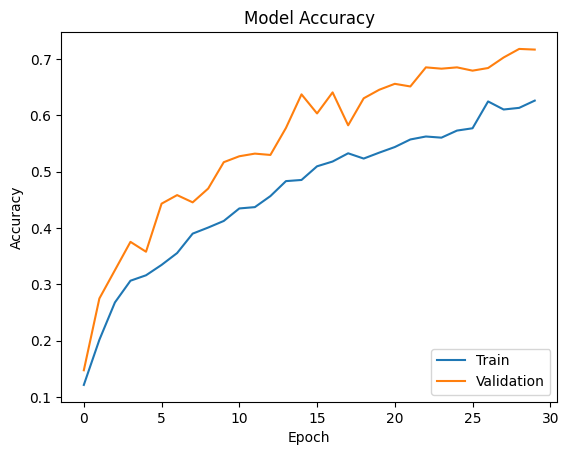

In [29]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

- The training accuracy shows a steady increase over the epochs, indicating that the model is learning and fitting to the training data
- The gap between training and validation accuracy becomes more apparent in later epochs, meaning the model is performing better on training data than on validation data

**Model evaluation on test data**

In [30]:
accuracy = model1.evaluate(X_test_norm, y_test_enc, verbose=2)
print(f"Test Accuracy: {accuracy[1]*100:.2f}%")

15/15 - 1s - 54ms/step - accuracy: 0.6821 - loss: 1.0355
Test Accuracy: 68.21%


- The model has generalized fairly well to unseen data

**Plot the confusion matrix**

In [31]:
y_pred = model1.predict(X_test_norm)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


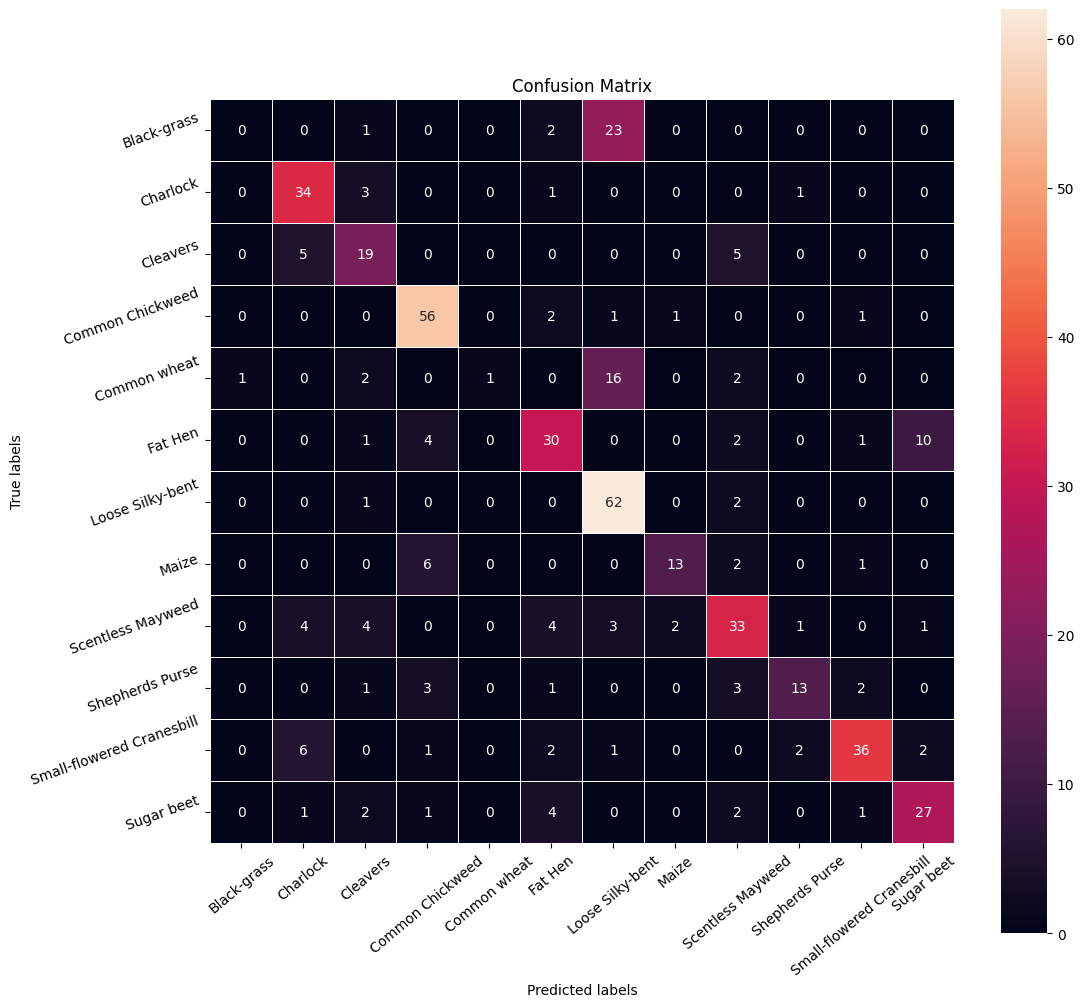

In [32]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_cat=np.argmax(y_pred,axis=1)
y_test_cat=np.argmax(y_test_enc,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function
confusion_matrix = tf.math.confusion_matrix(y_test_cat,y_pred_cat)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=20)
plt.show()

- The model demonstrates good classification performance for several classes, with high correct counts along the diagonal e.g. Common Chickweed, Loose Silky-bent, and Charlock
- Some misclassifications exist, particularly in classes like Black-grass and Sugar beet, which have notable misclassification counts

**Plotting the classification report**

In [33]:
#Plot the classification report
class_report = classification_report(y_test_cat, y_pred_cat, target_names=lb.classes_)
print(class_report)

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        26
                 Charlock       0.68      0.87      0.76        39
                 Cleavers       0.56      0.66      0.60        29
         Common Chickweed       0.79      0.92      0.85        61
             Common wheat       1.00      0.05      0.09        22
                  Fat Hen       0.65      0.62      0.64        48
         Loose Silky-bent       0.58      0.95      0.73        65
                    Maize       0.81      0.59      0.68        22
        Scentless Mayweed       0.65      0.63      0.64        52
          Shepherds Purse       0.76      0.57      0.65        23
Small-flowered Cranesbill       0.86      0.72      0.78        50
               Sugar beet       0.68      0.71      0.69        38

                 accuracy                           0.68       475
                macro avg       0.67      0.61      0.59    

- The model achieved an overall accuracy of 74%, which is a good indication of its effectiveness across all classes
- The weighted average F1-score of 0.72 suggests that the model performs consistently across different classes, considering the class number

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [34]:
# Code to monitor val accuracy
lrr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.5,
                              patience=2,
                              verbose=2,
                              min_lr=0.00001)

- To reduce the learning rate automatically when 'val_accuracy' stops improving
- Helps the modelto converge more efficiently by adjusting the learning rate dynamically

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [35]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

- Free up memory by clearing the current Keras session
- It avoids potential conflicts and memory leaks when repeatedly building and training models

- Fixing the random number generation across TensorFlow, Python's built-in random module, and NumPy

In [36]:
# Set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

- Randomly rotates images within a range of ±20 degrees to enhance model generalization

In [37]:
# Intializing a sequential model
model2 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))

# Add  max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()

# Compile the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

- A batch normalization layer is included, which helps in stabilizing and accelerating training by normalizing activations
- The model has a total of 151,676 parameters
- The model is well-structured with a good balance of convolutional and dense layers, incorporating regularization techniques such as dropout and batch normalization

**Fitting the model on the train data**

In [38]:
# fit the model on train data with batch_size=64 and epochs=30
epochs = 30
batch_size = 64
history2 = model2.fit(train_datagen.flow(X_train_norm,y_train_enc,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_norm.shape[0] // batch_size,
                                       validation_data=(X_val_norm,y_val_enc),
                                       verbose=1,callbacks=[lrr])

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.1527 - loss: 2.4559 - val_accuracy: 0.0830 - val_loss: 2.4372 - learning_rate: 0.0010
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.1173 - val_accuracy: 0.1146 - val_loss: 2.4305 - learning_rate: 0.0010
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.3202 - loss: 1.9816 - val_accuracy: 0.4047 - val_loss: 2.3470 - learning_rate: 0.0010
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.8631 - val_accuracy: 0.3848 - val_loss: 2.3634 - learning_rate: 0.0010
Epoch 5/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4379 - loss: 1.7333
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.4381 - loss: 1.7307 - val_accuracy: 0.3427 - val_loss: 2.1780 - learning_rate: 0.0010
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.6234 - val_ac

- The accuracy started low and improved  by the final epoch.
- The steady increase indicates the model is learning
- The fluctuations suggest it may still struggle with generalization

**Model evaluation**

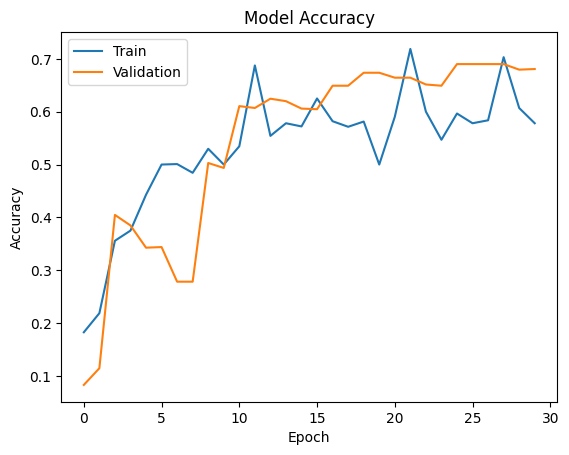

In [39]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The training accuracy shows a steady upward trend, indicating that the model is learning the training data effectively
- The validation accuracy also improves over time
- There are fluctuations, suggesting the model may be struggling with generalization

**Evaluate the model on validation data**

In [40]:
# Evaluate the model on test data
accuracy = model2.evaluate(X_test_norm, y_test_enc, verbose=2)
print(f"Test Accuracy: {accuracy[1]*100:.2f}%")

15/15 - 1s - 51ms/step - accuracy: 0.6505 - loss: 1.0505
Test Accuracy: 65.05%


**Plotting the confusion matrix**

In [41]:
y_pred = model2.predict(X_test_norm)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


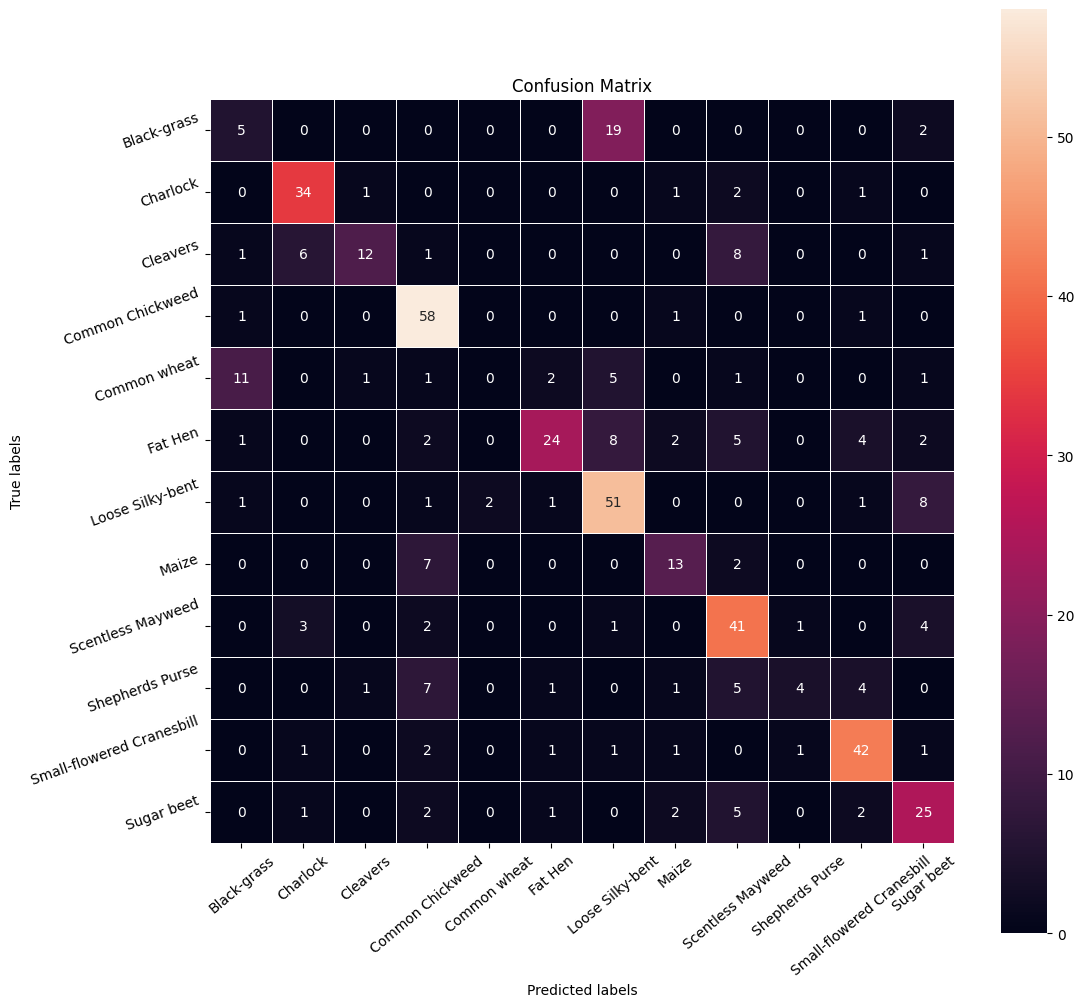

In [42]:
# Obtain the categorical values from y_test_enc and y_pred
y_pred_cat=np.argmax(y_pred,axis=1)
y_test_cat=np.argmax(y_test_enc,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow
confusion_matrix = tf.math.confusion_matrix(y_test_cat,y_pred_cat)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=20)
plt.show()

- The model performs well in correctly classifying some categories, such as:
  - Common Chickweed - 58 correct predictions
  - Loose Silky-bent - 54 correct predictions
  - Scentless Mayweed - 40 correct predictions
- There are misclassifications in classes like Black-grass and Common Wheat, indicating challenges in distinguishing these categories
- Common Wheat has misclassification with multiple categories, suggesting that the model struggles to identify unique features of this class
- 20 Black grass samples were misclassified as "Loose Silky-bent," suggesting similarities in their features.

**Plotting classification report**

In [43]:
# Plot the classification report
class_report = classification_report(y_test_cat, y_pred_cat, target_names=lb.classes_)
print(class_report)

                           precision    recall  f1-score   support

              Black-grass       0.25      0.19      0.22        26
                 Charlock       0.76      0.87      0.81        39
                 Cleavers       0.80      0.41      0.55        29
         Common Chickweed       0.70      0.95      0.81        61
             Common wheat       0.00      0.00      0.00        22
                  Fat Hen       0.80      0.50      0.62        48
         Loose Silky-bent       0.60      0.78      0.68        65
                    Maize       0.62      0.59      0.60        22
        Scentless Mayweed       0.59      0.79      0.68        52
          Shepherds Purse       0.67      0.17      0.28        23
Small-flowered Cranesbill       0.76      0.84      0.80        50
               Sugar beet       0.57      0.66      0.61        38

                 accuracy                           0.65       475
                macro avg       0.59      0.56      0.55    

- The model achieved an overall accuracy of 64%, which indicates moderate performance
- The weighted average F1-score of 0.62 shows that the model is fairly balanced across the different classes

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

- We have selected **model1** for the following reasons
  - It has better overall accuracy score
  - It has better overall F1 Score


### Visualizing the prediction

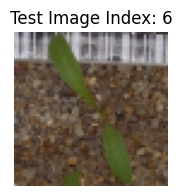

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Test Image Index: 6
Predicted Label: Fat Hen
Correct Label: Sugar beet
----------------------------------------


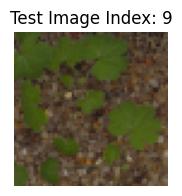

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Image Index: 9
Predicted Label: Small-flowered Cranesbill
Correct Label: Small-flowered Cranesbill
----------------------------------------


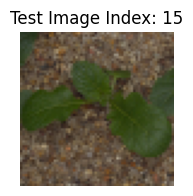

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test Image Index: 15
Predicted Label: Charlock
Correct Label: Charlock
----------------------------------------


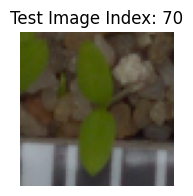

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Test Image Index: 70
Predicted Label: Common Chickweed
Correct Label: Common Chickweed
----------------------------------------


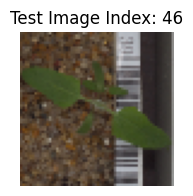

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Image Index: 46
Predicted Label: Sugar beet
Correct Label: Fat Hen
----------------------------------------


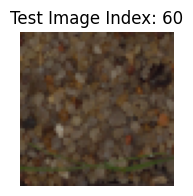

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Image Index: 60
Predicted Label: Loose Silky-bent
Correct Label: Loose Silky-bent
----------------------------------------


In [44]:
# List of indices to visualize
indices = [6,9, 15, 70, 46,60]

for idx in indices:
    # Display the image
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[idx])
    plt.title(f"Test Image Index: {idx}")
    plt.axis('off')
    plt.show()

    # Predict the label for the given index
    predicted_label = lb.inverse_transform(model1.predict(X_test_norm[idx].reshape(1, 64, 64, 3)))
    correct_label = lb.inverse_transform(np.array([y_test_enc[idx]]))

    # Print the results
    print(f"Test Image Index: {idx}")
    print('Predicted Label:', predicted_label[0])
    print('Correct Label:', correct_label[0])
    print('-' * 40)


- The model seems to classify most classes correctly

## Actionable Insights and Business Recommendations

* Focus efforts on improving low-performing classes by gathering more data, applying data augmentation, and fine-tuning the model
* Adjust classification thresholds to balance precision and recall, especially for critical classes
* Implement a hierarchical classification approach to first distinguish similar-looking classes before fine-tuning specific class recognition
* Introduce feature engineering techniques to highlight unique characteristics of each class
* Leverage transfer learning with pre-trained models e.g., ResNet, VGG for better generalization
* Collect more representative samples for misclassified categories
* Deploy confidence-based recommendations, where uncertain predictions are flagged for manual review
* Implement a feedback loop where human experts validate low-confidence predictions to continuously refine the model
* Run pilot tests in real-world conditions to evaluate performance beyond test datasets

_____